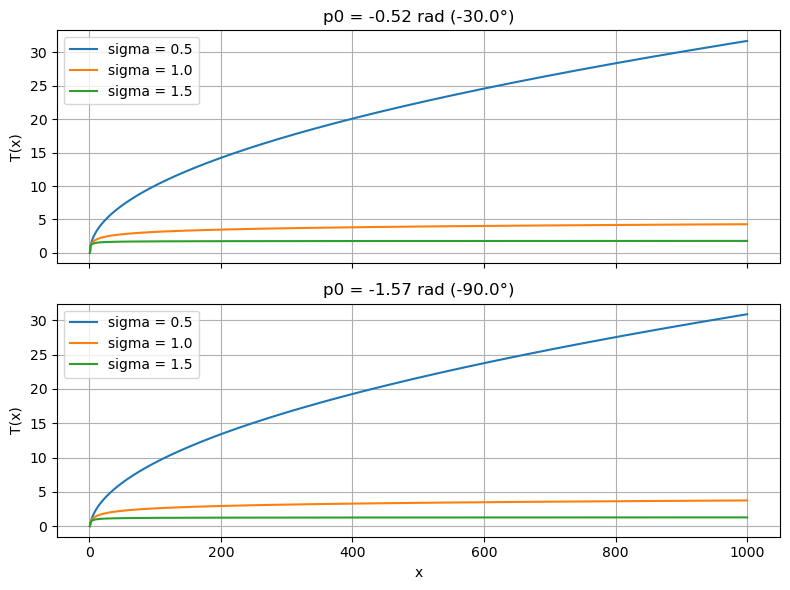

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def compute_T(x0, x_end, t1, t2, sigma, p0):
    """
    Compute T(x) defined by the summation approximation:
    
        T(x) = ∫[x0 to x] dx / sqrt((2*t(x))^2 + A)
    
    where t(x) is piecewise given by:
      - For even intervals: t(x) = t1 * (x)**sigma
      - For odd intervals:  t(x) = t2 * (x)**sigma
      
    A is defined as:
      A = -(2*t1*x0*cos(p0))^2
    and Δx is taken as 1.
    
    Parameters:
      x0    : starting value of x (should be > 0)
      x_end : ending value of x
      t1, t2: constants
      sigma : exponent used in the definition of t(x)
      p0    : constant angle in radians
      
    Returns:
      xs: numpy array of x values
      T : numpy array of the integrated result T(x)
    """
    # Calculate constant A
    A = -(2 * t1 * x0 * np.cos(p0))**2
    
    # Create x values with step Δx = 1
    xs = np.arange(x0, x_end + 1, 1)
    T = np.zeros_like(xs, dtype=float)
    delta_x = 1.0  # integration step size

    for i in range(len(xs) - 1):
        # Choose t(x) based on the interval index:
        # even index uses t1, odd index uses t2.
        if i % 2 == 0:
            t_val = t1 * (xs[i] ** sigma)
        else:
            t_val = t2 * (xs[i] ** sigma)
            
        # Compute the denominator
        denom = (2 * t_val)**2 + A
        
        # Check for non-positive denominator (to avoid division by zero or imaginary numbers)
        if denom <= 0:
            print(f"Warning: non-positive denominator at x = {xs[i]:.2f} for sigma = {sigma} and p0 = {p0:.2f}.")
            integrand = 0
        else:
            integrand = 1.0 / np.sqrt(denom)
        
        # Update the integrated value T using a simple Riemann sum:
        T[i + 1] = T[i] + integrand * delta_x

    return xs, T

def main():
    # Define parameters
    x0 = 1        # starting x-value (choose > 0)
    x_end = 1000      # ending x-value for the integration
    t1 = 1.0        # constant t1
    t2 = 1.0        # constant t2
    
    # Lists of sigma and p0 values to test.
    sigma_list = [0.5, 1.0, 1.5]       # different sigma values
    p0_list = [-np.pi/6,-np.pi/2]         # different p0 values in radians

    # Create a figure with one subplot per p0 value.
    fig, axs = plt.subplots(len(p0_list), 1, figsize=(8, 6), sharex=True)
    if len(p0_list) == 1:
        axs = [axs]

    for ax, p0 in zip(axs, p0_list):
        for sigma in sigma_list:
            xs, T = compute_T(x0, x_end, t1, t2, sigma, p0)
            ax.plot(xs, T, label=f"sigma = {sigma}")
        ax.set_title(f"p0 = {p0:.2f} rad ({np.degrees(p0):.1f}°)")
        ax.set_ylabel("T(x)")
        ax.legend()
        ax.grid(True)
    
    axs[-1].set_xlabel("x")
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


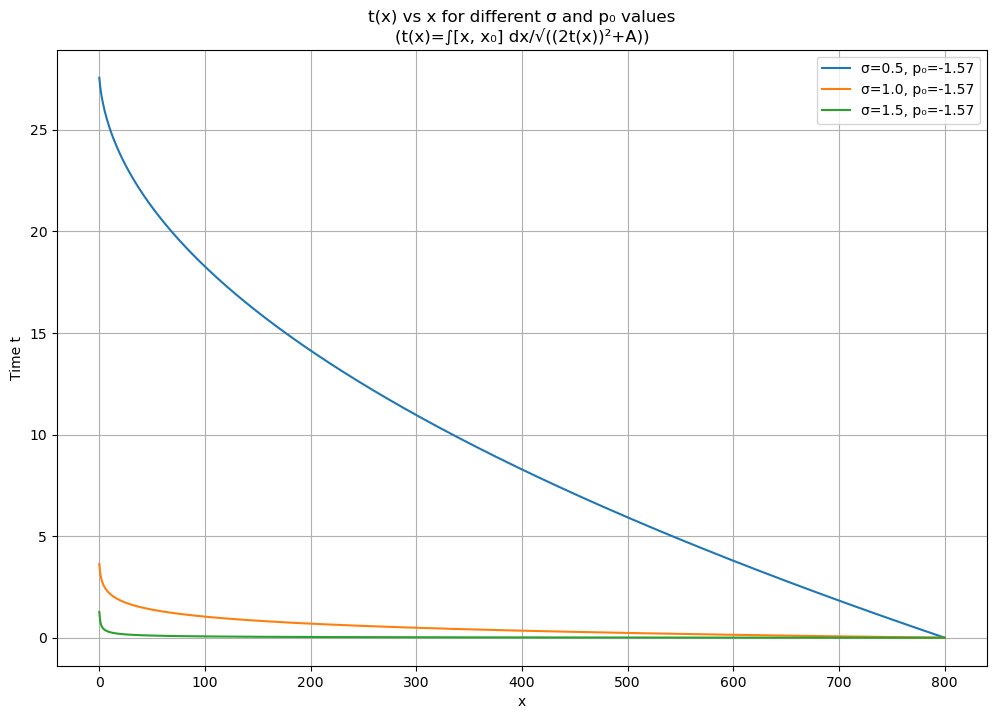

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def compute_integrated_t(x0, x_end, sigma, p0, t1, t2):
    """
    Compute t(x) = ∫[x, x0] (dx / sqrt((2*t(x))^2 + A)) via summation.
    
    The integration is performed in steps of Δx = 1 from x0 (initial point) to x_end.
    Here, the function used in the integrand is defined piecewise:
      - at even steps: t(x) = t1 * (x)^sigma
      - at odd steps:  t(x) = t2 * (x)^sigma
    A is defined as:
       A = - (2*t(x0)*cos(p0))^2, with t(x0)= t1 * x0^sigma.
       
    Because we integrate from x0 down to x_end, the integration is done in the reverse direction.
    To ensure that the final plot has x in the normal (increasing) order, the computed arrays are reversed.
    
    Parameters:
      x0    : initial x-value (e.g., 800)
      x_end : ending x-value (e.g., 0)
      sigma : exponent in t(x)
      p0    : constant p0 (in radians)
      t1, t2: constants for the alternating definition of t(x)
      
    Returns:
      x_values: numpy array of x values in ascending order (from x_end to x0)
      t_values: corresponding computed time values (nonnegative)
      A       : the computed constant A.
    """
    # Create x values from x0 down to x_end (descending order)
    x_vals_desc = np.arange(x0, x_end - 1, -1)  # e.g. 800, 799, ..., 0
    n_points = len(x_vals_desc)
    
    # Compute constant A using the initial condition: t(x0) = t1 * x0^sigma
    t_x0 = t1 * (x0 ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2

    # Initialize t (time) array. At the starting point (x0) time is zero.
    t_vals_desc = np.zeros(n_points)
    
    dx = 1.0  # Use absolute step size
    
    # Integrate from x0 down to x_end using a left-hand rule
    for i in range(n_points - 1):
        # For the integrand at the current step, choose t(x) piecewise:
        # even index: use t1*(x)^sigma, odd index: use t2*(x)^sigma
        if i % 2 == 0:
            t_integrand = t1 * (x_vals_desc[i] ** sigma)
        else:
            t_integrand = t2 * (x_vals_desc[i] ** sigma)
        
        # Compute the denominator: sqrt((2*t(x))^2 + A)
        denominator = np.sqrt((2 * t_integrand)**2 + A)
        
        # Compute the time increment (always positive)
        dt = dx / denominator
        t_vals_desc[i+1] = t_vals_desc[i] + dt

    # Reverse the arrays so that x is in ascending order (from x_end to x0)
    x_values = x_vals_desc[::-1]
    t_values = t_vals_desc[::-1]
    
    return x_values, t_values, A

# Parameters
x0 = 800           # starting x-value (initial condition point)
x_end = 0          # ending x-value
t1 = 1.0           # constant for even-index steps
t2 = 1.0           # constant for odd-index steps

# Lists of sigma and p0 values to test
sigma_list = [0.5, 1.0, 1.5]
p0_list = [ -np.pi/2]  # p0 in radians

plt.figure(figsize=(12, 8))

# Loop over different sigma and p0 combinations and plot t vs x
for sigma in sigma_list:
    for p0 in p0_list:
        x_vals, t_vals, A_val = compute_integrated_t(x0, x_end, sigma, p0, t1, t2)
        label = f'σ={sigma}, p₀={p0:.2f}'
        plt.plot(x_vals, t_vals, label=label)

plt.xlabel('x')
plt.ylabel('Time t')
plt.title('t(x) vs x for different σ and p₀ values\n(t(x)=∫[x, x₀] dx/√((2t(x))²+A))')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_29484\1122044056.py:51: RuntimeWarning: invalid value encountered in sqrt
  denominator = np.sqrt((2 * t_integrand)**2 + A)


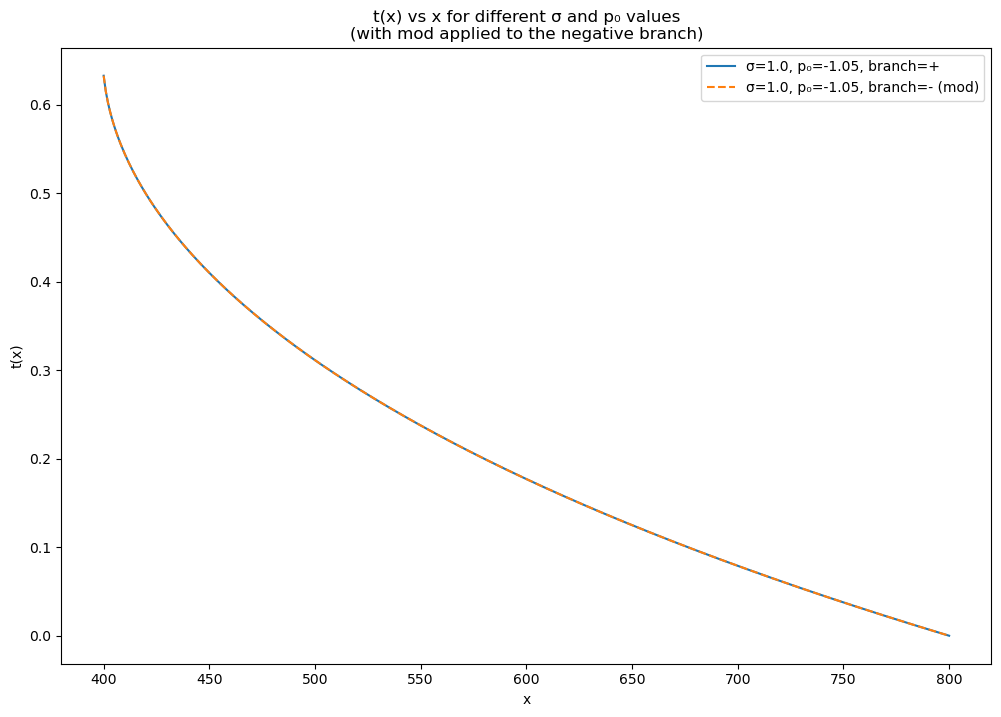

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1):
    """
    Compute t(x) = branch * ∫[x, x0] (dx / sqrt((2*t(x))^2 + A))
    using a summation method with Δx = 1.

    t(x) in the integrand is defined piecewise:
      - even indices: t(x) = t1 * x^sigma
      - odd indices:  t(x) = t2 * x^sigma

    A is defined as:
         A = - (2*t(x0)*cos(p0))^2,
    with t(x0) = t1*x0^sigma.

    Parameters:
      x0    : starting x-value (e.g. 800)
      x_end : ending x-value (e.g. 0)
      sigma : exponent in t(x)
      p0    : constant p0 (in radians)
      t1, t2: constants for alternating t(x)
      branch: +1 for the positive branch, -1 for the negative branch

    Returns:
      x_values: array of x values (in ascending order from x_end to x0)
      t_values: corresponding integrated t(x) values (after applying the branch sign)
      A       : the computed constant A.
    """
    # Create x values from x0 down to x_end (descending order)
    x_vals_desc = np.arange(x0, x_end - 1, -1)
    n_points = len(x_vals_desc)
    
    # Compute A using the initial condition t(x0) = t1*x0^sigma.
    t_x0 = t1 * (x0 ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2

    # Initialize the integrated t array; at x0, t is set to 0.
    T_vals_desc = np.zeros(n_points)
    dx = 1.0  # step size

    # Integrate from x0 down to x_end
    for i in range(n_points - 1):
        # Piecewise definition of t(x) in the integrand
        if i % 2 == 0:
            t_integrand = t1 * (x_vals_desc[i] ** sigma)
        else:
            t_integrand = t2 * (x_vals_desc[i] ** sigma)
        
        # Denom = sqrt((2*t(x))^2 + A)
        denominator = np.sqrt((2 * t_integrand)**2 + A)
        
        # Compute the time increment; dx is positive.
        dt = dx / denominator
        T_vals_desc[i+1] = T_vals_desc[i] + dt

    # Apply branch sign: branch=+1 (physical branch) or branch=-1 (other branch)
    T_vals_desc *= branch

    # Reverse arrays so that x is in ascending order (from x_end to x0)
    x_values = x_vals_desc[::-1]
    t_values = T_vals_desc[::-1]
    
    return x_values, t_values, A

# Parameters for the problem
x0 = 800           # starting x-value
x_end = 0          # ending x-value
t1 = 1          # constant for even-indexed steps
t2 = 1           # constant for odd-indexed steps

# Define lists of sigma and p0 values to test
sigma_list = [ 1.0]
p0_list = [-np.pi/3]  # p0 in radians

plt.figure(figsize=(12, 8))

# Loop over sigma and p0, and plot both the positive branch and the mod of the negative branch.
for sigma in sigma_list:
    for p0 in p0_list:
        # Positive branch (physical, nonnegative time)
        x_vals, t_vals_pos, A_val = compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1)
        label_pos = f'σ={sigma}, p₀={p0:.2f}, branch=+'
        plt.plot(x_vals, t_vals_pos, label=label_pos)
        
        # Negative branch computed; then take modulus (absolute value)
        x_vals, t_vals_neg, _ = compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=-1)
        t_vals_neg = np.abs(t_vals_neg)
        label_neg = f'σ={sigma}, p₀={p0:.2f}, branch=- (mod)'
        plt.plot(x_vals, t_vals_neg, '--', label=label_neg)

plt.xlabel('x')
plt.ylabel('t(x)')
plt.title('t(x) vs x for different σ and p₀ values\n(with mod applied to the negative branch)')
plt.legend()
# plt.grid()
plt.show()


Positive branch: sigma = 0.5, p0 = -1.57, t(0) = 27.5629319071101
Negative branch (mod): sigma = 0.5, p0 = -1.57, t(0) = 27.5629319071101


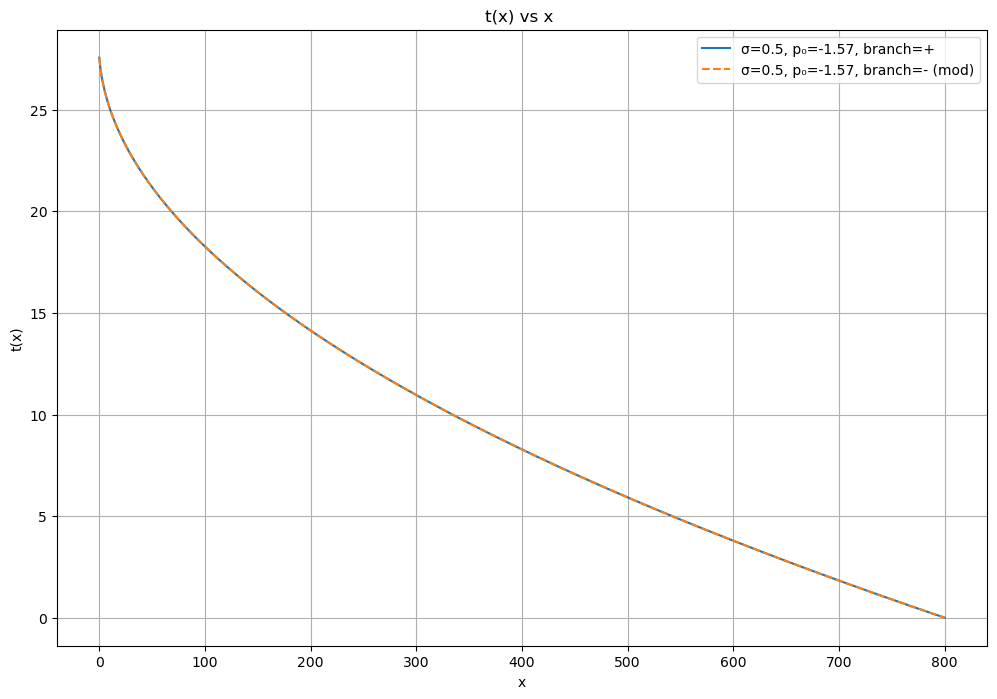

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1):
    """
    Compute t(x) = branch * ∫[x, x0] (dx / sqrt((2*t(x))^2 + A))
    using a summation method with Δx = 1.

    t(x) in the integrand is defined piecewise:
      - even indices: t(x) = t1 * x^sigma
      - odd indices:  t(x) = t2 * x^sigma

    A is defined as:
         A = - (2*t(x0)*cos(p0))^2,
    with t(x0) = t1*x0^sigma.

    Parameters:
      x0    : starting x-value (e.g. 800)
      x_end : ending x-value (e.g. 0)
      sigma : exponent in t(x)
      p0    : constant p0 (in radians)
      t1, t2: constants for alternating t(x)
      branch: +1 for the positive branch, -1 for the negative branch

    Returns:
      x_values: array of x values (in ascending order from x_end to x0)
      t_values: corresponding integrated t(x) values (after applying the branch sign)
      A       : the computed constant A.
    """
    # Create x values from x0 down to x_end (descending order)
    x_vals_desc = np.arange(x0, x_end - 1, -1)
    n_points = len(x_vals_desc)
    
    # Compute A using the initial condition t(x0) = t1*x0^sigma.
    t_x0 = t1 * (x0 ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2

    # Initialize the integrated t array; at x0, t is set to 0.
    T_vals_desc = np.zeros(n_points)
    dx = 1.0  # step size

    # Integrate from x0 down to x_end
    for i in range(n_points - 1):
        # Piecewise definition of t(x) in the integrand
        if i % 2 == 0:
            t_integrand = t1 * (x_vals_desc[i] ** sigma)
        else:
            t_integrand = t2 * (x_vals_desc[i] ** sigma)
        
        # Denom = sqrt((2*t(x))^2 + A)
        denominator = np.sqrt((2 * t_integrand)**2 + A)
        
        # Compute the time increment; dx is positive.
        dt = dx / denominator
        T_vals_desc[i+1] = T_vals_desc[i] + dt

    # Apply branch sign: branch=+1 (physical branch) or branch=-1 (other branch)
    T_vals_desc *= branch

    # Reverse arrays so that x is in ascending order (from x_end to x0)
    x_values = x_vals_desc[::-1]
    t_values = T_vals_desc[::-1]
    
    return x_values, t_values, A

# Parameters for the problem
x0 = 800           # starting x-value
x_end = 0          # ending x-value
t1 = 1             # constant for even-indexed steps
t2 = 1             # constant for odd-indexed steps

# Define lists of sigma and p0 values to test
sigma_list = [0.5]
p0_list = [-np.pi/2]  # p0 in radians

plt.figure(figsize=(12, 8))

# Loop over sigma and p0, and process both branches.
for sigma in sigma_list:
    for p0 in p0_list:
        # Positive branch (physical, nonnegative time)
        x_vals, t_vals_pos, A_val = compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1)
        # Print the value of t at x = 0 (first element, since x-values are in ascending order)
        print(f"Positive branch: sigma = {sigma}, p0 = {p0:.2f}, t(0) = {t_vals_pos[0]}")
        plt.plot(x_vals, t_vals_pos, label=f'σ={sigma}, p₀={p0:.2f}, branch=+')
        
        # Negative branch computed; then take modulus (absolute value)
        x_vals, t_vals_neg, _ = compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=-1)
        t_vals_neg = np.abs(t_vals_neg)
        print(f"Negative branch (mod): sigma = {sigma}, p0 = {p0:.2f}, t(0) = {t_vals_neg[0]}")
        plt.plot(x_vals, t_vals_neg, '--', label=f'σ={sigma}, p₀={p0:.2f}, branch=- (mod)')

plt.xlabel('x')
plt.ylabel('t(x)')
plt.title('t(x) vs x ')
plt.legend()
plt.grid(True)
plt.show()


Forward integration (positive branch): sigma = 1, p0 = -1.57, t(0) = 3.631226131180571


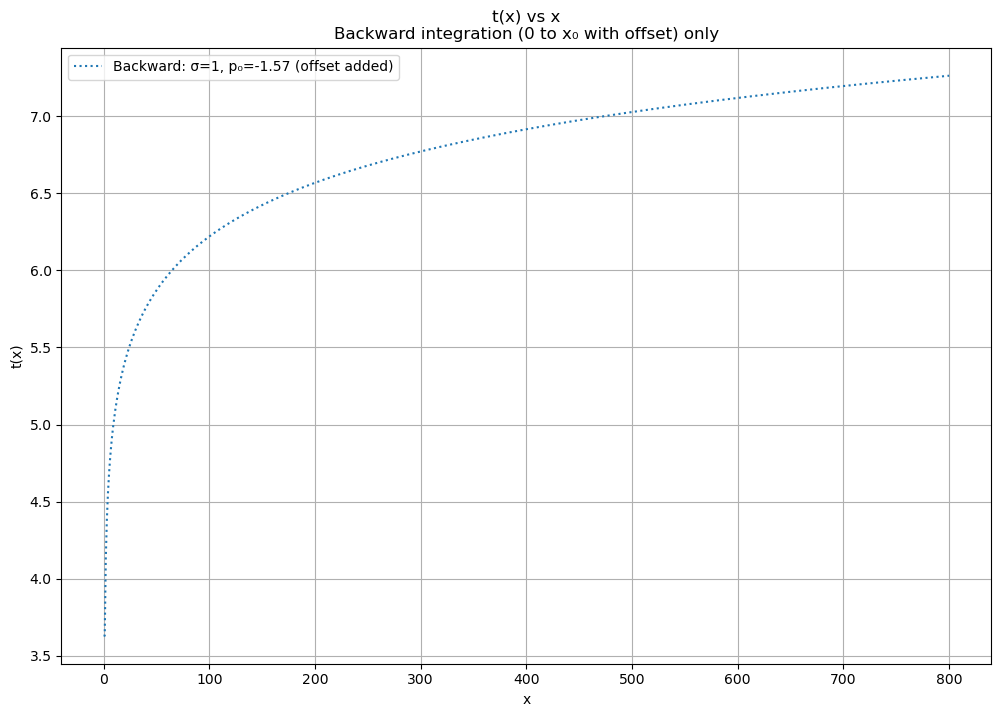

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

def compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1):
    """
    Compute t(x) = branch * ∫[x, x0] (dx / sqrt((2*t(x))^2 + A))
    using a summation method with Δx = 1.

    t(x) in the integrand is defined piecewise:
      - even indices: t(x) = t1 * x^sigma
      - odd indices:  t(x) = t2 * x^sigma

    A is defined as:
         A = - (2*t(x0)*cos(p0))^2,
    with t(x0) = t1*x0^sigma.

    The integration is performed from x0 down to x_end,
    and then the resulting arrays are reversed so that the x-values are
    in ascending order (from x_end to x0).

    Returns:
      x_values: array of x values (ascending from x_end to x0)
      t_values: corresponding integrated t(x) values (after branch is applied)
      A       : the computed constant A.
    """
    # Create x-values in descending order from x0 down to x_end
    x_vals_desc = np.arange(x0, x_end - 1, -1)
    n_points = len(x_vals_desc)
    
    # Compute A using the initial condition t(x0) = t1*x0^sigma.
    t_x0 = t1 * (x0 ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2

    # Initialize the integrated t array; at x0, t is set to 0.
    T_vals_desc = np.zeros(n_points)
    dx = 1.0  # step size

    # Integrate from x0 down to x_end.
    for i in range(n_points - 1):
        if i % 2 == 0:
            t_integrand = t1 * (x_vals_desc[i] ** sigma)
        else:
            t_integrand = t2 * (x_vals_desc[i] ** sigma)
        
        # To avoid division by zero when the denominator is very small,
        # we use np.maximum(denom, 1e-12).
        denom = np.sqrt((2 * t_integrand)**2 + A)
        dt = dx / np.maximum(denom, 1e-12)
        T_vals_desc[i+1] = T_vals_desc[i] + dt

    T_vals_desc *= branch

    # Reverse arrays so that x increases from x_end to x0.
    x_values = x_vals_desc[::-1]
    t_values = T_vals_desc[::-1]
    
    return x_values, t_values, A

def compute_integrated_t_asc(x_start, x_end, sigma, p0, t1, t2, branch=1):
    """
    Compute t(x) = branch * ∫[x_start to x] (dx / sqrt((2*t(x))^2 + A))
    using a summation method with Δx = 1, for x running from x_start to x_end.

    t(x) in the integrand is defined piecewise:
      - even indices: t(x) = t1 * x^sigma
      - odd indices:  t(x) = t2 * x^sigma

    A is computed using the original x0 (here passed as x_end) via
         A = - (2*t(x0)*cos(p0))^2,
    with t(x0) = t1*x0^sigma.

    IMPORTANT:
      If x_start is 0 and sigma ≠ 0, the integrand becomes singular.
      In that case we start at a small epsilon (here, 1) and then prepend 0.

    Returns:
      x_values: array of x values from 0 to x_end (ascending)
      t_values: corresponding integrated t(x) values (after branch is applied)
      A       : the computed constant A.
    """
    # If x_start is 0, use an epsilon to avoid singularity.
    if x_start == 0:
        eps = 1  # you can adjust this value if needed
        x_vals_eff = np.arange(eps, x_end + 1, 1)
        prepend_zero = True
    else:
        x_vals_eff = np.arange(x_start, x_end + 1, 1)
        prepend_zero = False
        
    n_points = len(x_vals_eff)
    
    # Compute A using the original x0 (passed as x_end)
    t_x0 = t1 * (x_end ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2
    
    T_vals = np.zeros(n_points)
    dx = 1.0

    for i in range(n_points - 1):
        if i % 2 == 0:
            t_integrand = t1 * (x_vals_eff[i] ** sigma)
        else:
            t_integrand = t2 * (x_vals_eff[i] ** sigma)
        denom = np.sqrt((2 * t_integrand)**2 + A)
        dt = dx / np.maximum(denom, 1e-12)
        T_vals[i+1] = T_vals[i] + dt
    
    T_vals *= branch
    
    if prepend_zero:
        # Prepend x=0 with T=0 to cover the full range
        x_vals = np.concatenate(([0], x_vals_eff))
        T_vals = np.concatenate(([0], T_vals))
    else:
        x_vals = x_vals_eff
        
    return x_vals, T_vals, A

# ----- Parameters for the problem -----
x0 = 800       # starting x-value (for forward integration, from x0 to 0)
x_end = 0      # ending x-value for forward integration
t1 = 1         # constant for even-indexed steps
t2 = 1         # constant for odd-indexed steps

# Define lists of sigma and p0 values to test.
sigma_list = [1]   # try other sigma values as well
p0_list = [-np.pi/2]  # p0 in radians

plt.figure(figsize=(12, 8))

for sigma in sigma_list:
    for p0 in p0_list:
        # --- Forward Integration (from x0 to 0) ---
        x_vals_forward, t_vals_forward, A_val = compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1)
        # Even if we comment out the plotting for forward integration, we still
        # compute T_total from it.
        T_total = t_vals_forward[0]  # t at x = 0 (after reversing)
        print(f"Forward integration (positive branch): sigma = {sigma}, p0 = {p0:.2f}, t(0) = {T_total}")
        
        # --- Backward Integration (from 0 to x0) ---
        # Here we integrate from x = 0 up to x = x0.
        x_vals_backward, t_vals_backward, _ = compute_integrated_t_asc(0, x0, sigma, p0, t1, t2, branch=1)
        # Add the offset (T_total from forward integration) at each step.
        t_vals_backward += T_total
        plt.plot(x_vals_backward, t_vals_backward, ':', label=f'Backward: σ={sigma}, p₀={p0:.2f} (offset added)')

plt.xlabel('x')
plt.ylabel('t(x)')
plt.title('t(x) vs x\nBackward integration (0 to x₀ with offset) only')
plt.legend()
plt.grid(True)
plt.show()


Forward integration (positive branch): sigma = 0.4, p0 = -1.57, t(0) = 35.33879941285201


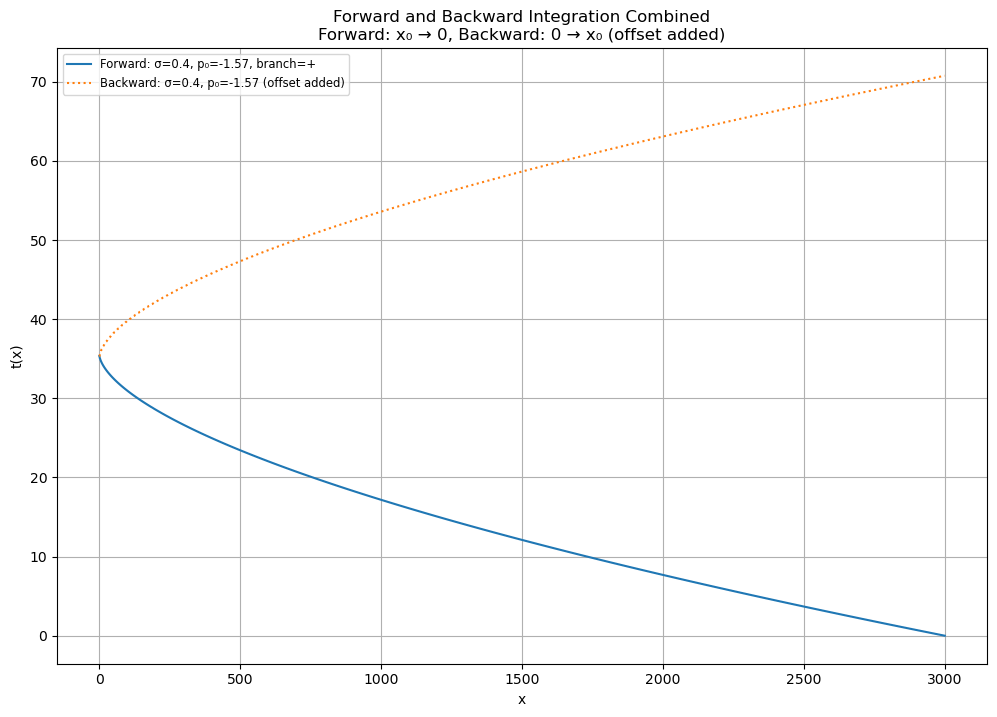

In [54]:
import numpy as np 
import matplotlib.pyplot as plt

def compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1):
    """
    Compute t(x) = branch * ∫[x, x0] (dx / sqrt((2*t(x))^2 + A))
    using a summation method with Δx = 1.
    
    t(x) in the integrand is defined piecewise:
      - even indices: t(x) = t1 * x^sigma
      - odd indices:  t(x) = t2 * x^sigma
    
    A is defined as:
         A = - (2*t(x0)*cos(p0))^2,
    with t(x0) = t1*x0^sigma.
    
    The integration is performed from x0 down to x_end,
    and then the arrays are reversed so that the x-values are in ascending order.
    
    Returns:
      x_values: array of x values (ascending from x_end to x0)
      t_values: corresponding integrated t(x) values (after branch is applied)
      A       : the computed constant A.
    """
    # Create x-values in descending order from x0 down to x_end
    x_vals_desc = np.arange(x0, x_end - 1, -1)
    n_points = len(x_vals_desc)
    
    # Compute A from the initial condition t(x0)=t1*x0^sigma.
    t_x0 = t1 * (x0 ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2

    # Initialize the cumulative integral; at x0, t = 0.
    T_vals_desc = np.zeros(n_points)
    dx = 1.0

    for i in range(n_points - 1):
        # Use piecewise rule for the integrand:
        if i % 2 == 0:
            t_integrand = t1 * (x_vals_desc[i] ** sigma)
        else:
            t_integrand = t2 * (x_vals_desc[i] ** sigma)
        
        # Safeguard against a zero denominator
        denom = np.sqrt((2 * t_integrand)**2 + A)
        dt = dx / np.maximum(denom, 1e-12)
        T_vals_desc[i+1] = T_vals_desc[i] + dt

    T_vals_desc *= branch
    # Reverse the arrays so that x increases from x_end to x0.
    x_values = x_vals_desc[::-1]
    t_values = T_vals_desc[::-1]
    return x_values, t_values, A

def compute_integrated_t_asc(x_start, x_end, sigma, p0, t1, t2, branch=1):
    """
    Compute t(x) = branch * ∫[x_start to x] (dx / sqrt((2*t(x))^2 + A))
    using a summation method with Δx = 1, for x running from x_start to x_end.
    
    t(x) in the integrand is defined piecewise:
      - even indices: t(x) = t1 * x^sigma
      - odd indices:  t(x) = t2 * x^sigma
    
    A is computed using the original x₀ (passed as x_end) via:
         A = - (2*t(x₀)*cos(p0))^2,
    with t(x₀) = t1*x₀^sigma.
    
    IMPORTANT:
      If x_start is 0 and sigma ≠ 0, the integrand may be singular.
      In that case we start from a small epsilon (here 1) and then prepend the (0,0) point.
    
    Returns:
      x_values: array of x values from 0 to x_end (ascending)
      t_values: corresponding integrated t(x) values (after branch is applied)
      A       : the computed constant A.
    """
    if x_start == 0:
        eps = 1  # small epsilon to avoid singularity
        x_vals_eff = np.arange(eps, x_end + 1, 1)
        prepend_zero = True
    else:
        x_vals_eff = np.arange(x_start, x_end + 1, 1)
        prepend_zero = False
        
    n_points = len(x_vals_eff)
    
    # Use the original x₀ (passed as x_end) to compute A.
    t_x0 = t1 * (x_end ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2
    
    T_vals = np.zeros(n_points)
    dx = 1.0
    for i in range(n_points - 1):
        if i % 2 == 0:
            t_integrand = t1 * (x_vals_eff[i] ** sigma)
        else:
            t_integrand = t2 * (x_vals_eff[i] ** sigma)
        denom = np.sqrt((2 * t_integrand)**2 + A)
        dt = dx / np.maximum(denom, 1e-12)
        T_vals[i+1] = T_vals[i] + dt
    
    T_vals *= branch
    
    if prepend_zero:
        # Prepend the (0,0) point
        x_values = np.concatenate(([0], x_vals_eff))
        T_vals = np.concatenate(([0], T_vals))
    else:
        x_values = x_vals_eff
        
    return x_values, T_vals, A

# ----- Parameters -----
x0 = 3000       # starting x-value (forward integration from x0 to 0)
x_end = 0      # ending x-value for forward integration
t1 = 2         # constant for even-indexed steps
t2 = 5         # constant for odd-indexed steps

# Choose sigma and p0 (in radians) for testing.
sigma_list = [0.4]  # try other sigma values as desired
p0_list = [-np.pi/2]  # p0 in radians

plt.figure(figsize=(12, 8))

for sigma in sigma_list:
    for p0 in p0_list:
        # --- Forward Integration (from x0 to 0) ---
        x_forward, t_forward, A_val = compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1)
        # x_forward[0] corresponds to x = 0, so T_total is the forward integration value at 0.
        T_total = t_forward[0]
        print(f"Forward integration (positive branch): sigma = {sigma}, p0 = {p0:.2f}, t(0) = {T_total}")
        plt.plot(x_forward, t_forward, label=f'Forward: σ={sigma}, p₀={p0:.2f}, branch=+')
        
        # --- Backward Integration (from 0 to x0) ---
        # Compute backward integration from 0 up to x0.
        x_backward, t_backward, _ = compute_integrated_t_asc(0, x0, sigma, p0, t1, t2, branch=1)
        # Add the forward integration total as an offset.
        t_backward += T_total
        plt.plot(x_backward, t_backward, ':', label=f'Backward: σ={sigma}, p₀={p0:.2f} (offset added)')

plt.xlabel('x')
plt.ylabel('t(x)')
plt.title('Forward and Backward Integration Combined\nForward: x₀ → 0, Backward: 0 → x₀ (offset added)')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_40256\3481708495.py:43: RuntimeWarning: invalid value encountered in scalar power
  t_integrand = t1 * (x_vals_desc[i] ** sigma)


Forward integration (positive branch): sigma = 0.5, p0 = 1.57, t(0) = nan


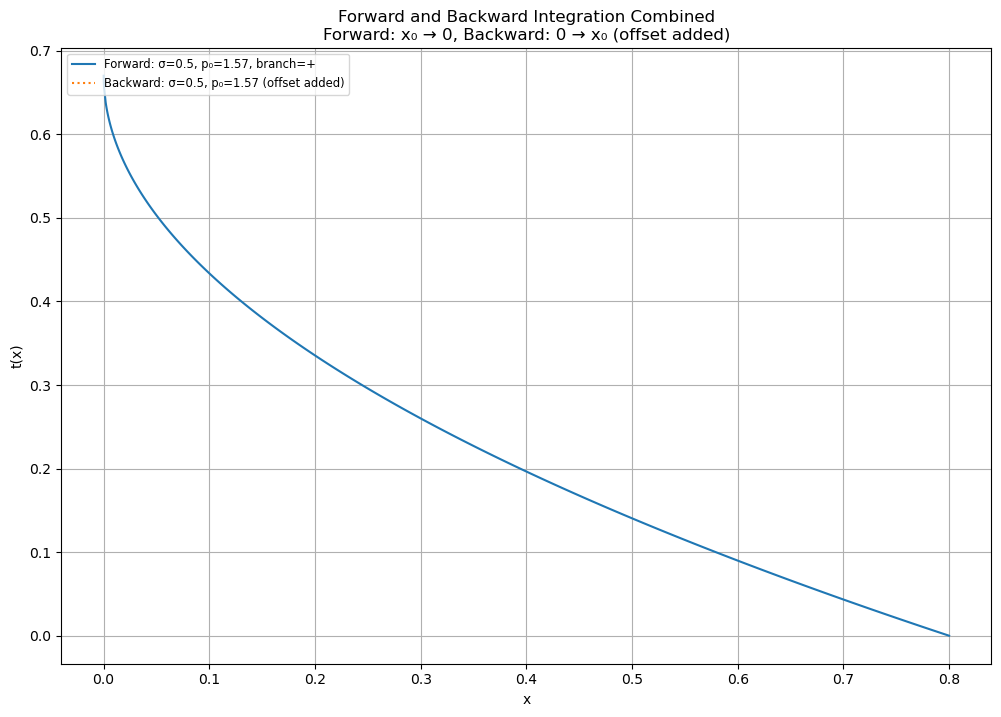

In [4]:
#ARBITRARILY SMALL DELTA X 


import numpy as np  
import matplotlib.pyplot as plt

def compute_integrated_t(x0, x_end, sigma, p0, t1, t2, delta_x=1.0, branch=1):
    """
    Compute t(x) = branch * ∫[x, x0] (dx / sqrt((2*t(x))^2 + A))
    using a summation method with step size delta_x.
    
    The integrand t(x) is defined piecewise:
      - even indices: t(x) = t1 * x^sigma
      - odd indices:  t(x) = t2 * x^sigma
      
    A is defined as:
         A = - (2*t(x0)*cos(p0))^2,
    with t(x0) = t1*x0^sigma.
    
    The integration is performed from x0 down to x_end,
    and then the arrays are reversed so that the x-values are in ascending order.
    
    Returns:
      x_values: array of x values (ascending from x_end to x0)
      t_values: corresponding integrated t(x) values (after branch is applied)
      A       : the computed constant A.
    """
    # Generate x-values in descending order with step -delta_x.
    x_vals_desc = np.arange(x0, x_end - delta_x, -delta_x)
    n_points = len(x_vals_desc)
    
    # Compute A using the initial condition t(x0)=t1*x0^sigma.
    t_x0 = t1 * (x0 ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2

    # Initialize the cumulative integral; at x0, the integrated value is 0.
    T_vals_desc = np.zeros(n_points)
    dx = delta_x

    for i in range(n_points - 1):
        # Alternate between t1 and t2
        if i % 2 == 0:
            t_integrand = t1 * (x_vals_desc[i] ** sigma)
        else:
            t_integrand = t2 * (x_vals_desc[i] ** sigma)
        
        # Compute dt using the current integrand value.
        denom = np.sqrt((2 * t_integrand)**2 + A)
        dt = dx / np.maximum(denom, 1e-12)
        T_vals_desc[i+1] = T_vals_desc[i] + dt

    T_vals_desc *= branch
    # Reverse the arrays so that x increases from x_end to x0.
    x_values = x_vals_desc[::-1]
    t_values = T_vals_desc[::-1]
    return x_values, t_values, A

def compute_integrated_t_asc(x_start, x_end, sigma, p0, t1, t2, delta_x=1.0, branch=1):
    """
    Compute t(x) = branch * ∫[x_start to x] (dx / sqrt((2*t(x))^2 + A))
    using a summation method with step size delta_x, for x running from x_start to x_end.
    
    The integrand t(x) is defined piecewise:
      - even indices: t(x) = t1 * x^sigma
      - odd indices:  t(x) = t2 * x^sigma
    
    A is computed using the original x₀ (passed as x_end) via:
         A = - (2*t(x₀)*cos(p0))^2,
    with t(x₀) = t1*x₀^sigma.
    
    IMPORTANT:
      If x_start is 0 and sigma ≠ 0, the integrand may be singular.
      In that case we start from a small epsilon (here taken as delta_x) and then prepend the (0,0) point.
    
    Returns:
      x_values: array of x values from 0 (if applicable) to x_end (ascending)
      t_values: corresponding integrated t(x) values (after branch is applied)
      A       : the computed constant A.
    """
    if x_start == 0:
        eps = delta_x  # small epsilon to avoid singularity
        x_vals_eff = np.arange(eps, x_end + delta_x, delta_x)
        prepend_zero = True
    else:
        x_vals_eff = np.arange(x_start, x_end + delta_x, delta_x)
        prepend_zero = False
        
    n_points = len(x_vals_eff)
    
    # Compute A using the original x₀ (passed as x_end).
    t_x0 = t1 * (x_end ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2
    
    T_vals = np.zeros(n_points)
    dx = delta_x
    for i in range(n_points - 1):
        if i % 2 == 0:
            t_integrand = t1 * (x_vals_eff[i] ** sigma)
        else:
            t_integrand = t2 * (x_vals_eff[i] ** sigma)
        denom = np.sqrt((2 * t_integrand)**2 + A)
        dt = dx / np.maximum(denom, 1e-12)
        T_vals[i+1] = T_vals[i] + dt
    
    T_vals *= branch
    
    if prepend_zero:
        # Prepend the (0,0) point to avoid the singularity.
        x_values = np.concatenate(([0], x_vals_eff))
        T_vals = np.concatenate(([0], T_vals))
    else:
        x_values = x_vals_eff
        
    return x_values, T_vals, A

# ----- Parameters -----
x0 = 0.8       # starting x-value (for forward integration from x0 to 0)
x_end = 0      # ending x-value for forward integration
t1 = 1         # constant for even-indexed steps (first t: t1(x0))
t2 = 2         # constant for odd-indexed steps

# Choose sigma and p0 (in radians) for testing.
sigma_list = [0.5]    # try other sigma values as desired
p0_list = [np.pi/2]  # p0 in radians

# Set the integration step size (delta_x) arbitrarily small: try 0.1, 0.01, etc.
delta_x = 0.000001

plt.figure(figsize=(12, 8))

for sigma in sigma_list:
    for p0 in p0_list:
        # --- Forward Integration (from x0 to 0) ---
        x_forward, t_forward, A_val = compute_integrated_t(x0, x_end, sigma, p0, t1, t2, delta_x, branch=1)
        # x_forward[0] corresponds to x = 0, so T_total is the forward integration value at 0.
        T_total = t_forward[0]
        print(f"Forward integration (positive branch): sigma = {sigma}, p0 = {p0:.2f}, t(0) = {T_total}")
        plt.plot(x_forward, t_forward, label=f'Forward: σ={sigma}, p₀={p0:.2f}, branch=+')
        
        # --- Backward Integration (from 0 to x0) ---
        x_backward, t_backward, _ = compute_integrated_t_asc(0, x0, sigma, p0, t1, t2, delta_x, branch=1)
        # Add the forward integration total as an offset.
        t_backward += T_total
        plt.plot(x_backward, t_backward, ':', label=f'Backward: σ={sigma}, p₀={p0:.2f} (offset added)')

plt.xlabel('x')
plt.ylabel('t(x)')
plt.title('Forward and Backward Integration Combined\nForward: x₀ → 0, Backward: 0 → x₀ (offset added)')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()


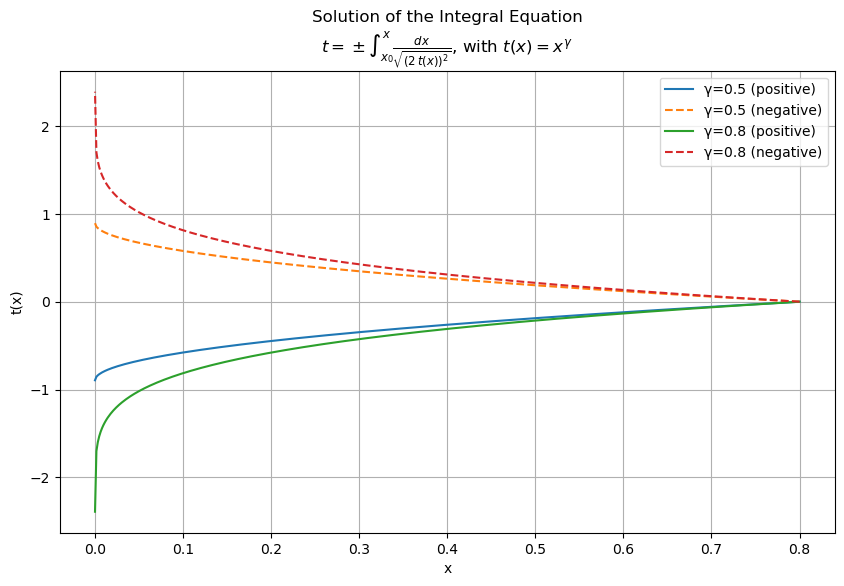

In [26]:
#JUST THE INTERGRATION


import numpy as np
import matplotlib.pyplot as plt

def analytic_solution(x, x0, gamma, branch=1):
    """
    Computes the analytic solution of
       t = ± ∫_{x0}^{x} dx/(2 x^gamma)
    given that t(x) = x^gamma is used in the integrand.
    
    For gamma != 1:
      t(x) = branch/(2(1-gamma)) * ( x^(1-gamma) - x0^(1-gamma) )
    For gamma == 1:
      t(x) = branch/2 * ln(x/x0)
      
    Parameters:
      x      : array of x values
      x0     : lower limit of integration
      gamma  : exponent parameter
      branch : +1 (positive branch) or -1 (negative branch)
    
    Returns:
      t(x) : array of computed t values.
    """
    if np.isclose(gamma, 1.0):
        return branch * 0.5 * np.log(x/x0)
    else:
        return branch / (2*(1 - gamma)) * (x**(1 - gamma) - x0**(1 - gamma))

# ----- Parameters -----
x0 = 0.8  # initial point (lower limit of integration)
x_vals = np.linspace(x0, 0, 500)  # x values from 1 to 10

# Choose some gamma values to explore
gamma_values = [0.5, 0.8]

plt.figure(figsize=(10, 6))

for gamma in gamma_values:
    # Positive branch solution:
    t_pos = analytic_solution(x_vals, x0, gamma, branch=1)
    # Negative branch solution:
    t_neg = analytic_solution(x_vals, x0, gamma, branch=-1)
    
    plt.plot(x_vals, t_pos, label=f'γ={gamma} (positive)')
    plt.plot(x_vals, t_neg, '--', label=f'γ={gamma} (negative)')

plt.xlabel('x')
plt.ylabel('t(x)')
plt.title('Solution of the Integral Equation\n'
          r'$t=\pm\int_{x_0}^{x}\frac{dx}{\sqrt{(2\,t(x))^2}}$, with $t(x)=x^\gamma$')
plt.legend()
plt.grid(True)
plt.show()


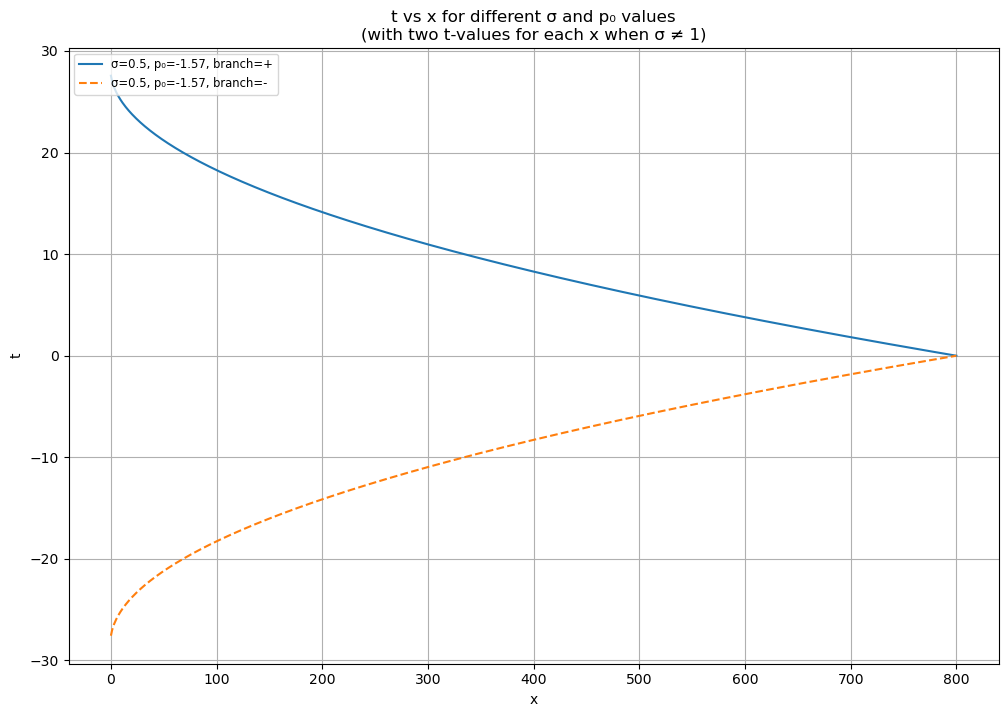

In [3]:
#NEW C

import numpy as np
import matplotlib.pyplot as plt

def compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1, dx=1.0):
    """
    Compute t(x) = branch * ∫[x0 to x] (dx / sqrt((2*t(x))^2 + A))
    via a summation method with step dx = 1.
    
    In the integrand, t(x) is defined piecewise:
      - For even-index steps: t(x) = t1 * (x)^sigma
      - For odd-index steps:  t(x) = t2 * (x)^sigma
    
    A is defined by:
         A = - (2*t(x0)*cos(p0))^2,
    where t(x0) = t1*x0^sigma.
    
    Because the integration in the equation is from x0 down to x,
    we create a descending x-array then reverse it so that the final x-values
    are in the usual (increasing) order.
    
    Parameters:
      x0     : starting x-value (initial point; e.g. 800)
      x_end  : ending x-value (e.g. 0)
      sigma  : exponent in t(x)
      p0     : p0 (in radians)
      t1, t2 : constants used alternately in the piecewise definition of t(x)
      branch : +1 gives the positive branch; -1 gives the negative branch
      
    Returns:
      x_vals : numpy array of x values (in ascending order from x_end to x0)
      t_vals : corresponding computed t(x) values for the chosen branch
      A      : computed constant A.
    """
    # Compute A from the initial condition: t(x0)=t1*x0^sigma.
    t_x0 = t1 * (x0 ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2

    # Create an array of x-values from x0 down to x_end (descending order)
    # (For step size dx=1, the array will include x0, x0-1, ... down to x_end.)
    x_desc = np.arange(x0, x_end - 1, -dx)
    n = len(x_desc)
    
    # Initialize an array to hold the integrated t values.
    # At x=x0 (the starting point) the integral is zero.
    t_desc = np.zeros(n)
    
    # Perform the summation integration.
    for i in range(n - 1):
        # Determine the piecewise t value used in the integrand.
        if i % 2 == 0:
            t_piece = t1 * (x_desc[i] ** sigma)
        else:
            t_piece = t2 * (x_desc[i] ** sigma)
            
        # Compute the denominator: sqrt((2*t_piece)^2 + A)
        denom = np.sqrt((2 * t_piece)**2 + A)
        
        # The increment in t is given by dt = dx / denom.
        dt = dx / denom
        t_desc[i+1] = t_desc[i] + dt
    
    # Apply the branch sign to account for the ± in the equation.
    t_desc *= branch
    
    # Reverse the arrays so that x is in ascending order (from x_end to x0)
    x_vals = x_desc[::-1]
    t_vals = t_desc[::-1]
    
    return x_vals, t_vals, A

# ----- Parameters -----
x0 = 800       # starting x-value (initial point)
x_end = 0      # ending x-value
t1 = 1         # constant for even-indexed intervals
t2 = 1         # constant for odd-indexed intervals

# Choose sigma values and p0 values (in radians)
# (For sigma != 1 the two branches will differ.)
sigma_list = [0.5]
p0_list = [-np.pi/2]

plt.figure(figsize=(12, 8))

# Loop over sigma and p0 values.
for sigma in sigma_list:
    for p0 in p0_list:
        # Compute the positive branch (branch = +1)
        x_vals, t_vals_pos, A_val = compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=1)
        label_pos = f'σ={sigma}, p₀={p0:.2f}, branch=+'
        plt.plot(x_vals, t_vals_pos, label=label_pos)
        
        # Compute the negative branch (branch = -1)
        x_vals, t_vals_neg, _ = compute_integrated_t(x0, x_end, sigma, p0, t1, t2, branch=-1)
        label_neg = f'σ={sigma}, p₀={p0:.2f}, branch=-'
        plt.plot(x_vals, t_vals_neg, '--', label=label_neg)

plt.xlabel('x')
plt.ylabel('t')
plt.title('t vs x for different σ and p₀ values\n(with two t-values for each x when σ ≠ 1)')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_29484\3473649653.py:32: RuntimeWarning: invalid value encountered in sqrt
  integrand = 1 / np.sqrt((2 * tau) ** 2 + A)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_29484\3473649653.py:32: RuntimeWarning: divide by zero encountered in divide
  integrand = 1 / np.sqrt((2 * tau) ** 2 + A)


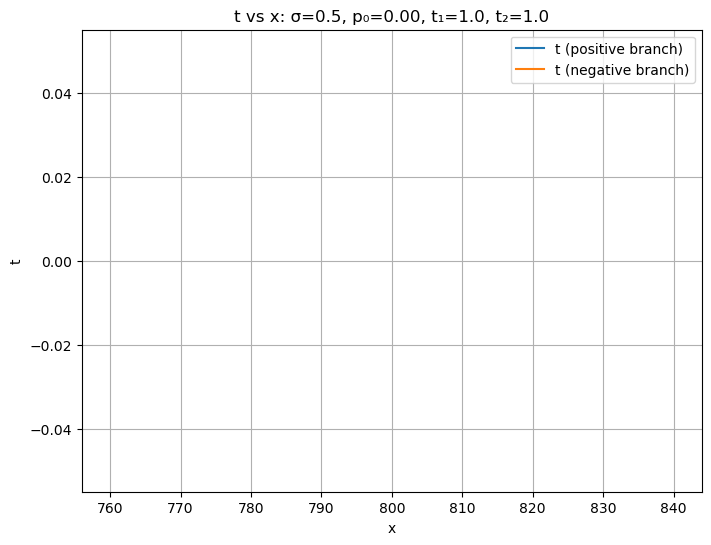

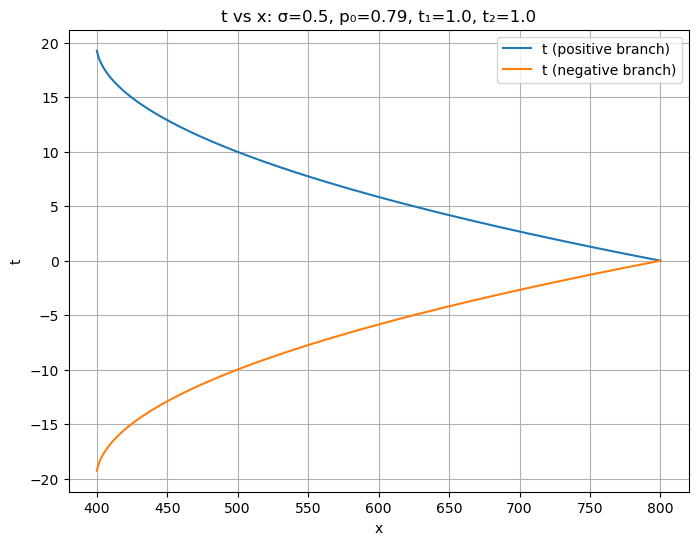

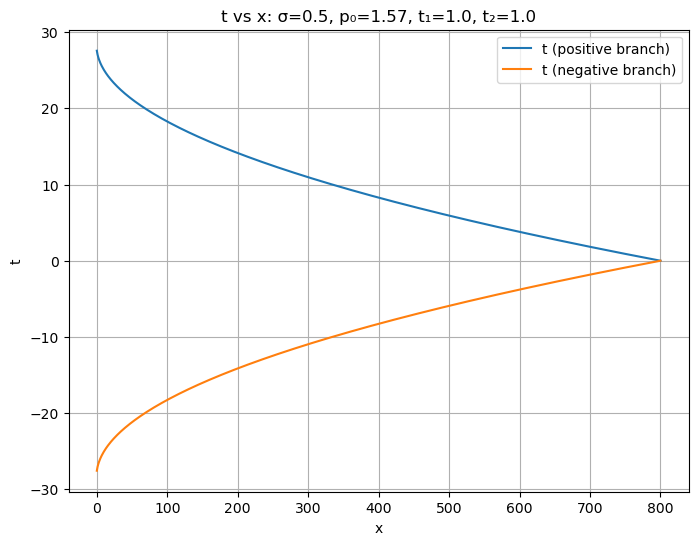

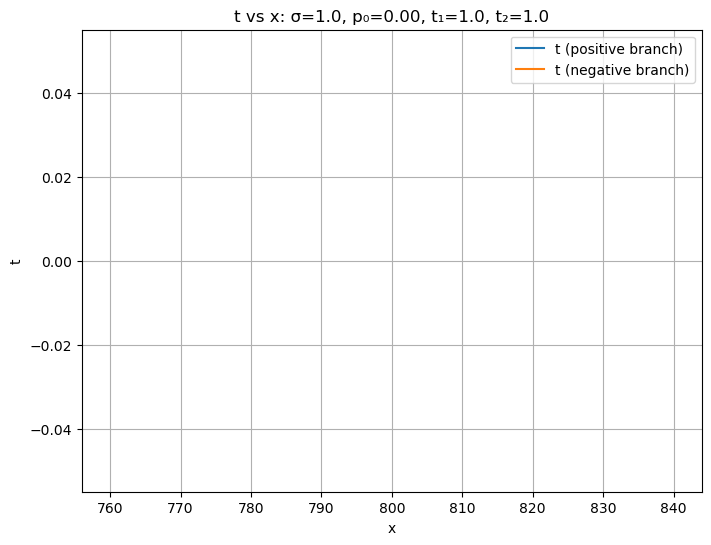

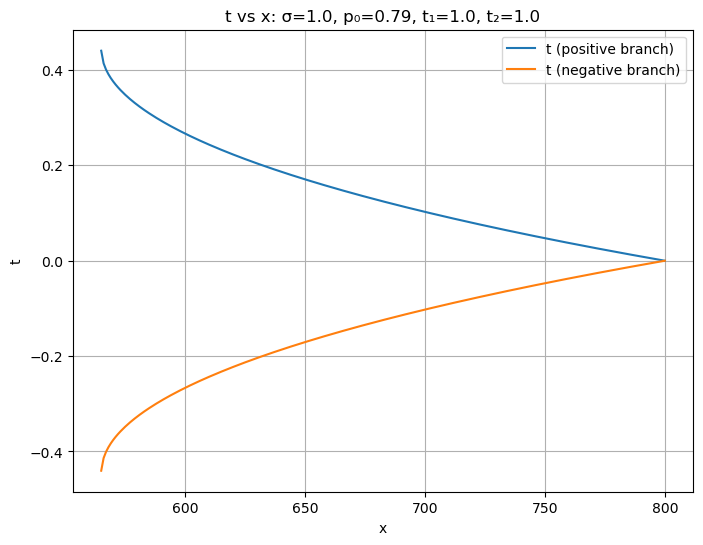

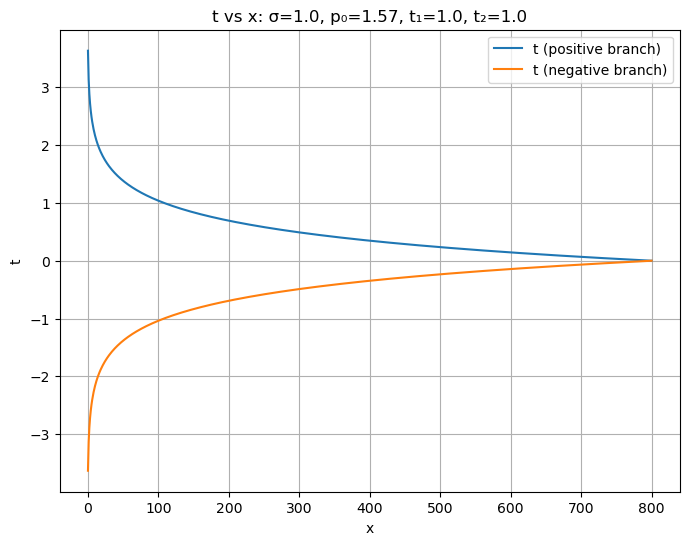

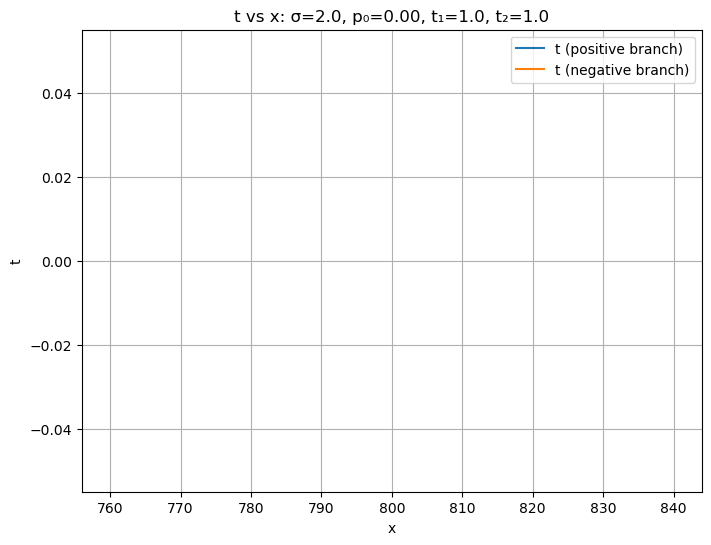

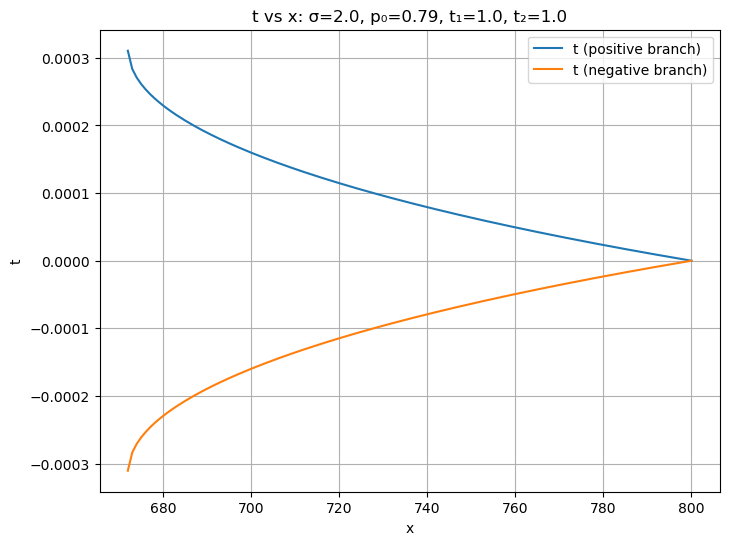

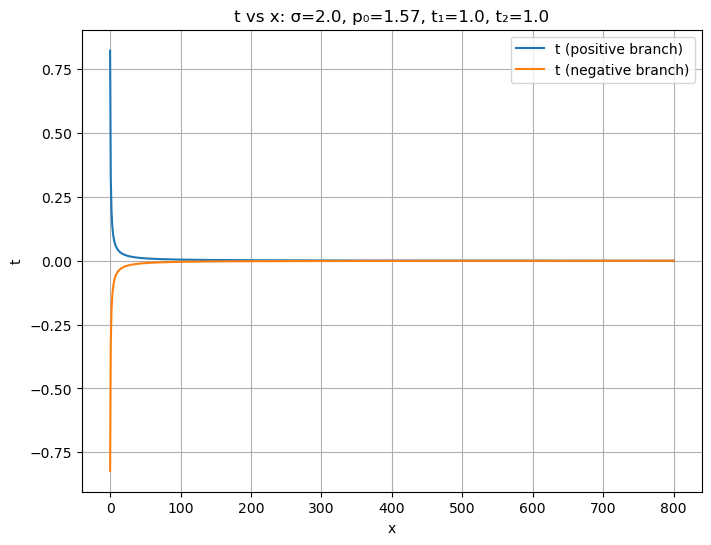

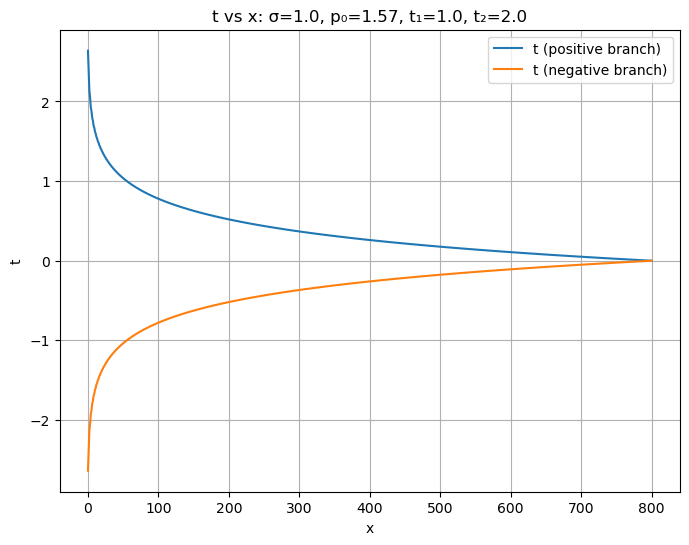

In [4]:
#NEW X
import numpy as np
import matplotlib.pyplot as plt

def compute_and_plot_t_vs_x(t1, t2, sigma, p0):
    """
    Compute t(x) using summation method and plot t vs x.
    
    Parameters:
    - t1, t2: Constants for tau(x)
    - sigma: Exponent in tau(x)
    - p0: Parameter in A
    """
    # Define constants
    x0 = 800
    N = 800  # Steps from 800 to 0
    x = np.arange(x0, -1, -1)  # x = [800, 799, ..., 0], length 801
    
    # Compute tau(x_k)
    tau = np.zeros(N + 1)
    for k in range(N + 1):
        if k % 2 == 0:
            tau[k] = t1 * (x[k] ** sigma)
        else:
            tau[k] = t2 * (x[k] ** sigma)
    
    # Compute A
    A = -(2 * tau[0] * np.cos(p0)) ** 2
    
    # Compute the integrand
    try:
        integrand = 1 / np.sqrt((2 * tau) ** 2 + A)
    except ValueError:
        print(f"Warning: Negative under sqrt for sigma={sigma}, p0={p0}. Plotting with A=0 instead.")
        integrand = 1 / (2 * np.abs(tau))  # Fallback to A=0
    
    # Compute t(x_n) for positive branch
    t_positive = np.zeros(N + 1)
    for n in range(1, N + 1):
        t_positive[n] = t_positive[n - 1] + integrand[n - 1]
    
    # Negative branch
    t_negative = -t_positive
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(x, t_positive, label='t (positive branch)')
    plt.plot(x, t_negative, label='t (negative branch)')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(f't vs x: σ={sigma}, p₀={p0:.2f}, t₁={t1}, t₂={t2}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters to test
t1, t2 = 1.0, 1.0  # Can adjust these, e.g., t2 = 2.0 to see alternation
sigmas = [0.5, 1.0, 2.0]
p0s = [0, np.pi/4, np.pi/2]

# Generate plots
for sigma in sigmas:
    for p0 in p0s:
        compute_and_plot_t_vs_x(t1, t2, sigma, p0)

# Example with t1 != t2
compute_and_plot_t_vs_x(1.0, 2.0, 1.0, np.pi/2)

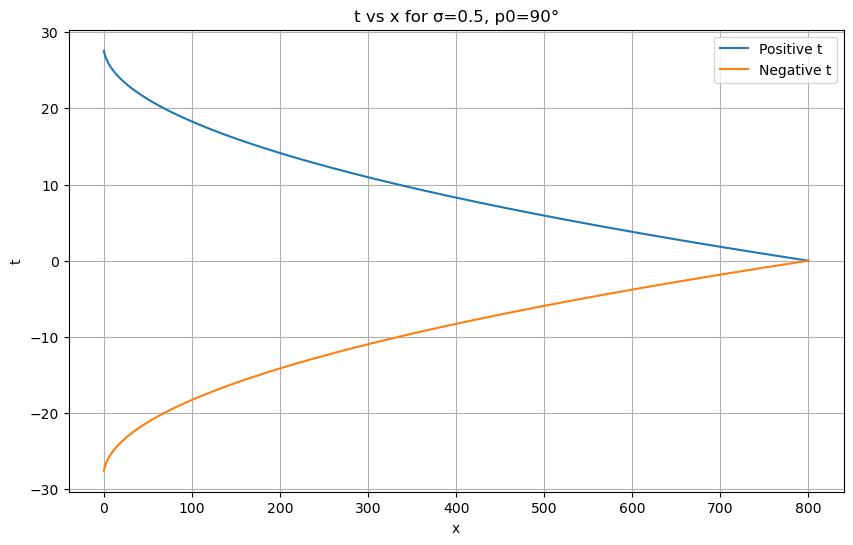

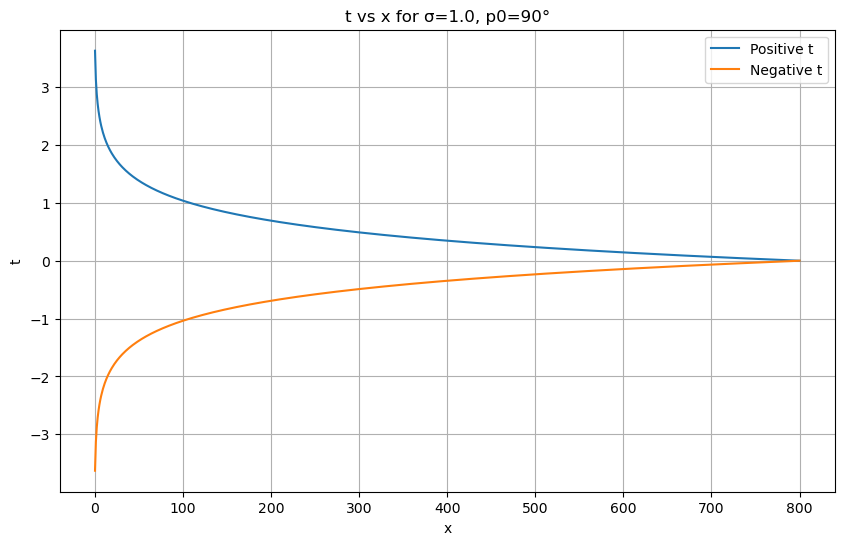

In [7]:
#NEW D
import numpy as np
import matplotlib.pyplot as plt

def compute_and_plot(x0=800, delta_x=-1, t1=1.0, t2=1.0, sigma=0.5, p0=np.pi/4):
    # Compute A (Note: A = 0 due to t(x0) = 0)
    A = -(2 * 0 * np.cos(p0))**2  # This will always be 0

    # Number of steps from x0 to 0
    num_steps = x0 - 0
    x_values_plot = np.arange(x0, 0 - 1, delta_x)  # x values from x0 down to 0 inclusive

    # Precompute t_i for each interval [xi, xi+1]
    t_i = []
    for i in range(num_steps):
        xi = x0 - i  # Current x value at the start of the interval
        if i % 2 == 0:
            ti = t1 * (xi ** sigma)
        else:
            ti = t2 * (xi ** sigma)
        t_i.append(ti)

    # Compute contributions for each interval
    contributions = [delta_x / (2 * ti) for ti in t_i]

    # Compute cumulative sum of contributions
    cumulative_sum = np.cumsum(contributions)
    cumulative_sum = np.insert(cumulative_sum, 0, 0)  # Add t=0 at x0

    # Calculate positive and negative t values
    t_positive = -cumulative_sum  # Invert the negative sum
    t_negative = cumulative_sum

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x_values_plot, t_positive, label='Positive t')
    plt.plot(x_values_plot, t_negative, label='Negative t')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(f't vs x for σ={sigma}, p0={np.degrees(p0):.0f}°')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage with different sigma and p0 values
sigmas = [0.5, 1.0]
p0_values = [ np.pi/2]

for sigma in sigmas:
    for p0 in p0_values:
        compute_and_plot(sigma=sigma, p0=p0)

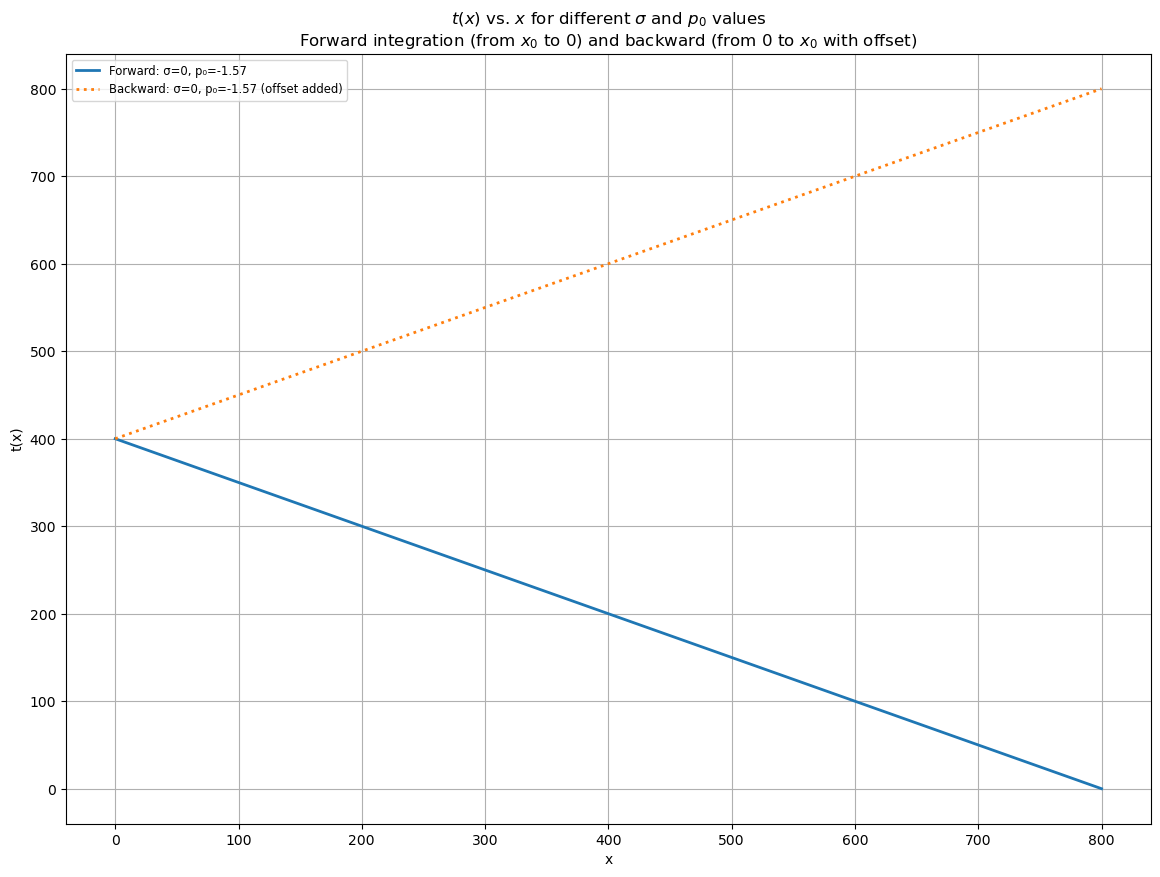

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def compute_integrated_t_desc(x0, x_end, sigma, p0, t1, t2, dx=1.0):
    """
    Forward integration from x0 down to x_end.
    
    Computes:  
       T(x) = ∫[x0 to x] (dx / sqrt(|(2*t(x))^2 + A|))
    where t(x) in the integrand is defined piecewise:
       even index: t(x) = t1 * x^sigma
       odd  index: t(x) = t2 * x^sigma
    and A = - (2*t(x0)*cos(p0))^2 with t(x0)=t1*x0^sigma.
    
    The integration is done with step dx, and then the arrays are reversed
    so that x increases from x_end to x0.
    """
    # Create a descending x-array from x0 down to x_end (inclusive)
    x_vals_desc = np.arange(x0, x_end - 1, -dx)
    n = len(x_vals_desc)
    
    # Compute A from the initial condition
    t_x0 = t1 * (x0 ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2
    
    # Initialize cumulative integral (at x0, T=0)
    T_vals_desc = np.zeros(n)
    
    for i in range(n - 1):
        # Piecewise definition for the integrand
        if i % 2 == 0:
            t_piece = t1 * (x_vals_desc[i] ** sigma)
        else:
            t_piece = t2 * (x_vals_desc[i] ** sigma)
        # Use absolute value inside sqrt to avoid imaginary numbers
        denom = np.sqrt(np.abs((2 * t_piece)**2 + A))
        dt = dx / denom
        T_vals_desc[i+1] = T_vals_desc[i] + dt

    # Reverse arrays so that x increases from x_end to x0
    x_vals = x_vals_desc[::-1]
    T_vals = T_vals_desc[::-1]
    return x_vals, T_vals, A

def compute_integrated_t_asc(x_start, x_end, sigma, p0, t1, t2, dx=1.0, offset=0.0):
    """
    Backward integration from x_start up to x_end.
    
    Computes:  
         T(x) = offset + ∫[x_start to x] (dx / sqrt(|(2*t(x))^2 + A|))
    where the integrand uses the same piecewise rule as in the forward run.
    Here A is computed in the same way as in the forward integration,
    i.e. A = - (2*t(x0)*cos(p0))^2 with t(x0)=t1*x0^sigma,
    and we assume that x_end here equals the original x0.
    """
    # x values in ascending order from x_start to x_end (inclusive)
    x_vals = np.arange(x_start, x_end + dx, dx)
    n = len(x_vals)
    
    # Use the same A as before; here x_end plays the role of x0.
    t_x0 = t1 * (x_end ** sigma)
    A = - (2 * t_x0 * np.cos(p0))**2
    
    T_vals = np.zeros(n)
    
    for i in range(n - 1):
        if i % 2 == 0:
            t_piece = t1 * (x_vals[i] ** sigma)
        else:
            t_piece = t2 * (x_vals[i] ** sigma)
        denom = np.sqrt(np.abs((2 * t_piece)**2 + A))
        dt = dx / denom
        T_vals[i+1] = T_vals[i] + dt
    
    # Add the offset (the total from the forward integration)
    T_vals = T_vals + offset
    return x_vals, T_vals, A

# ----- Parameters -----
x0 = 800       # initial x value (x0)
x_end = 0      # end value for the forward integration
t1 = 1         # constant for even-indexed steps
t2 = 1         # constant for odd-indexed steps

# Choose sigma and p0 values (in radians)
sigma_list = [0]
p0_list = [-np.pi/2]

plt.figure(figsize=(14, 10))

for sigma in sigma_list:
    for p0 in p0_list:
        # --- Forward integration: from x0 down to 0 ---
        x_forward, T_forward, A_val = compute_integrated_t_desc(x0, x_end, sigma, p0, t1, t2, dx=1.0)
        # T_forward[0] corresponds to x = 0 (after reversal)
        T_total = T_forward[0]
        
        # Plot forward integration (x from 0 to x0, T from T_total to 0)
        label_forward = f'Forward: σ={sigma}, p₀={p0:.2f}'
        plt.plot(x_forward, T_forward, label=label_forward, linewidth=2)
        
        # --- Backward integration: from 0 back up to x0 ---
        # Here we integrate from x=0 to x=x0 and add the offset T_total.
        x_back, T_back, _ = compute_integrated_t_asc(0, x0, sigma, p0, t1, t2, dx=1.0, offset=T_total)
        label_back = f'Backward: σ={sigma}, p₀={p0:.2f} (offset added)'
        plt.plot(x_back, T_back, linestyle=':', linewidth=2, label=label_back)

plt.xlabel('x')
plt.ylabel('t(x)')
plt.title(r'$t(x)$ vs. $x$ for different $\sigma$ and $p_0$ values' "\n"
          r'Forward integration (from $x_0$ to 0) and backward (from 0 to $x_0$ with offset)')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()
